Comenzamos importando las librerias...

In [1]:
import pandas as pd
import numpy as np

Extraemos los datos del CSV

In [2]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

Mostramos los datos

In [3]:
df.head()

,NObeyesdad,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,Normal_Weight,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation
1,Normal_Weight,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Normal_Weight,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation
3,Overweight_Level_I,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking
4,Overweight_Level_II,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


Definimos los valores que van a tomar los datos que no son numéricos

In [4]:
obesity_rep = {
    "Insufficient_Weight": 0,
    "Normal_Weight":       0,
    "Overweight_Level_I":  0,
    "Overweight_Level_II": 1,
    "Obesity_Type_I":      1,
    "Obesity_Type_II":     1,
    "Obesity_Type_III":    1
}
gender_rep = {
    "Male":   1,
    "Female": 0
}
calc_rep = {
    "no":         0,
    "Sometimes":  2,
    "Frequently": 5,
    "Always":     10
}
favc_rep = {
    "no":  0,
    "yes": 1
}
scc_rep = {
    "no":  0,
    "yes": 1
}
smoke_rep = {
    "no":  0,
    "yes": 1
}
family_rep = {
    "no":  0,
    "yes": 1
}
caec_rep = {
    "no":         0,
    "Sometimes":  1,
    "Frequently": 2,
    "Always":     3
}
mtrans_rep = {
    "Walking":               0,
    "Bike":                  1,
    "Public_Transportation": 2,
    "Motorbike":             3,
    "Automobile":            4
}

In [5]:
rep_d = {
    "NObeyesdad":                     obesity_rep,
    "Gender":                         gender_rep,
    "CALC":                           calc_rep,
    "FAVC":                           favc_rep,
    "SCC":                            scc_rep,
    "SMOKE":                          smoke_rep,
    "family_history_with_overweight": family_rep,
    "CAEC":                           caec_rep,
    "MTRANS":                         mtrans_rep
}

Reemplazamos los valores en el Dataframe

In [6]:
for col, rep in rep_d.items():
    df[col] = df[col].replace(rep)
df.head()

C:\Users\mastr\AppData\Local\Temp\ipykernel_11292\3434095541.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(rep)


,NObeyesdad,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,0,21.0,0,1.62,64.0,0,0,2.0,3.0,0,0,2.0,1,0.0,1.0,1,2
1,0,21.0,0,1.52,56.0,2,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,2
2,0,23.0,1,1.80,77.0,5,0,2.0,3.0,0,0,2.0,1,2.0,1.0,1,2
3,0,27.0,1,1.80,87.0,5,0,3.0,3.0,0,0,2.0,0,2.0,0.0,1,0
4,1,22.0,1,1.78,89.8,2,0,2.0,1.0,0,0,2.0,0,0.0,0.0,1,2


Normalizamos los valores para que esten entre 0 y 1

In [7]:
features = ["Age","Gender","Height","Weight","CALC","FAVC",
            "FCVC","NCP","SCC","SMOKE","CH2O","family_history_with_overweight",
            "FAF","TUE","CAEC","MTRANS"]

df[features] = df[features] / df[features].max()
df.describe()

,NObeyesdad,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.597821,0.398567,0.505921,0.859433,0.500497,0.149787,0.883941,0.806348,0.671407,0.045476,0.020843,0.669337,0.817622,0.336766,0.328933,0.380231,0.595452
std,0.490454,0.104032,0.500083,0.047124,0.151394,0.113491,0.320371,0.177976,0.194510,0.208395,0.142893,0.204318,0.386247,0.283531,0.304464,0.156181,0.228473
min,0.000000,0.229508,0.000000,0.732323,0.225434,0.000000,0.000000,0.333333,0.250000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.327003,0.000000,0.823232,0.378459,0.000000,1.000000,0.666667,0.664685,0.000000,0.000000,0.528271,1.000000,0.041502,0.000000,0.333333,0.500000
50%,1.000000,0.373408,1.000000,0.858838,0.479769,0.200000,1.000000,0.795167,0.750000,0.000000,0.000000,0.666667,1.000000,0.333333,0.312675,0.333333,0.500000
75%,1.000000,0.426230,1.000000,0.893164,0.620987,0.200000,1.000000,1.000000,0.750000,0.000000,0.000000,0.825807,1.000000,0.555559,0.500000,0.333333,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Hacemos la correlación

In [8]:
df.corr()

,NObeyesdad,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
NObeyesdad,1.000000,0.339603,0.076379,0.145900,0.758599,0.007399,0.161267,0.094564,-0.030855,-0.233659,0.004706,0.106859,0.510772,-0.166731,-0.065972,-0.277500,0.109074
Age,0.339603,1.000000,0.048394,-0.025958,0.202560,0.052571,0.063902,0.016291,-0.043944,-0.116283,0.091987,-0.045304,0.205725,-0.144938,-0.296931,-0.083739,0.568687
Gender,0.076379,0.048394,1.000000,0.618466,0.161668,0.000231,0.064934,-0.274505,0.067600,-0.102633,0.044698,0.107930,0.102512,0.189607,0.017269,-0.091543,0.110158
Height,0.145900,-0.025958,0.618466,1.000000,0.463136,0.125006,0.178364,-0.038121,0.243672,-0.133753,0.055499,0.213376,0.247684,0.294709,0.051912,-0.048818,0.054537
Weight,0.758599,0.202560,0.161668,0.463136,1.000000,0.179783,0.272300,0.216125,0.107469,-0.201906,0.025746,0.200575,0.496820,-0.051436,-0.071561,-0.287493,0.021611
CALC,0.007399,0.052571,0.000231,0.125006,0.179783,1.000000,0.072965,0.050961,0.058540,0.012433,0.090869,0.090798,-0.036025,-0.070233,-0.028362,-0.023945,0.002156
FAVC,0.161267,0.063902,0.064934,0.178364,0.272300,0.072965,1.000000,-0.027283,-0.007000,-0.190658,-0.050660,0.009719,0.208036,-0.107995,0.068417,-0.150068,0.117427
FCVC,0.094564,0.016291,-0.274505,-0.038121,0.216125,0.050961,-0.027283,1.000000,0.042216,0.071852,0.014320,0.068461,0.040372,0.019939,-0.101135,0.054670,-0.058673
NCP,-0.030855,-0.043944,0.067600,0.243672,0.107469,0.058540,-0.007000,0.042216,1.000000,-0.015624,0.007811,0.057088,0.071370,0.129504,0.036326,0.097801,0.044714
SCC,-0.233659,-0.116283,-0.102633,-0.133753,-0.201906,0.012433,-0.190658,0.071852,-0.015624,1.000000,0.047731,0.008036,-0.185422,0.074221,-0.010928,0.109179,-0.053885


Graficamos la correlacion

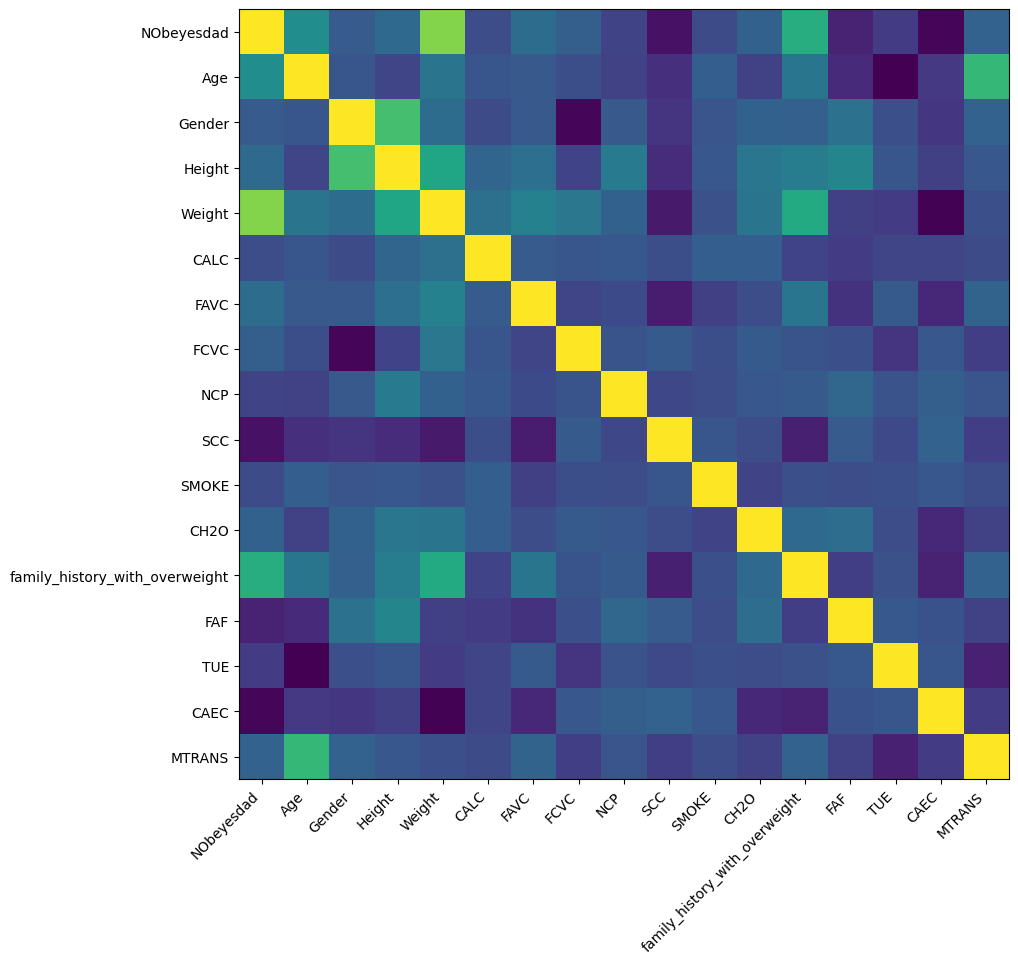

In [9]:
import matplotlib.pyplot as plt
labels = df.columns.to_list()
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow((df.corr().to_numpy()))
ax.set_xticks(np.arange(0, len(labels)))
ax.set_xticklabels(df.columns.to_list(), rotation=45, ha='right')
ax.set_yticks(np.arange(0, len(labels)))
ax.set_yticklabels(df.columns.to_list(), ha='right');

Dividimos los datos de prueba y entrenamiento

In [10]:
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm

X = df[features].values
Y = df["NObeyesdad"].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/4)

Hacemos el Forward Propagation

In [11]:
# Número de registros de entrenamiento
n = X_train.shape[0]
print(n)
np.random.seed(2)
# Inicializar los pesos y sesgos de la red neuronal
w_hidden = np.random.rand(16, 16) * 2 - 1
w_output = np.random.rand(1, 16) * 2 - 1

b_hidden = np.random.rand(16, 1) * 2 - 1
b_output = np.random.rand(1, 1) * 2 - 1

# Funciones de activación
relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))


# Función para propagar hacia adelante (forward propagation)
def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

1583


Hacemos el calculo de precision

In [12]:
# Cálculo de precisión
test_predictions = forward_prop(X_test.transpose())[3]
test_predictions = (test_predictions >= 0.5).astype(int)  # Convierto las predicciones en valores binarios (0 o 1)
accuracy = np.mean(test_predictions == Y_test.reshape(1, -1))  # Calculo la precisión comparando las predicciones con las etiquetas reales

print("ACCURACY: ", accuracy)

ACCURACY:  0.6306818181818182


Hacemos el Backward Propagation para entrenar la red neuronal

In [13]:
accuracy_test_l = []
accuracy_train_l = []
cont = 0
L = 0.005  # La tasa de aprendizaje

# Derivadas de las funciones de activación
d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

# Devuelve pendientes para pesos y sesgos
# usando la regla de la cadena
def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# Ejecutamos descenso de gradiente
for i in tqdm(range(100000)):
    cont += 1
    # Seleccionamos aleatoriamente un conjunto de datos de entrenamiento
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # Pasamos los datos seleccionados aleatoriamente a través de la red neuronal
    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # Distribuimos el error a través de la retropropagación
    # y devolvemos pendientes para pesos y sesgos
    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # Actualizar pesos y sesgos
    w_hidden -= L * dW1
    b_hidden -= L * dB1
    w_output -= L * dW2
    b_output -= L * dB2
    
    if (cont % 1000) == 0 :
        # Cálculo de precisión del test
        test_predictions = forward_prop(X_test.transpose())[3]
        test_predictions = (test_predictions >= 0.5).astype(int)  # Convertimos las predicciones en valores binarios (0 o 1)
        accuracy_TEST = np.mean(test_predictions == Y_test.reshape(1, -1))  # Calculamos la precisión comparando las predicciones con las etiquetas reales
        accuracy_test_l.append(accuracy_TEST)

        # Cálculo de precisión del train
        train_predictions = forward_prop(X_train.transpose())[3]
        train_predictions = (train_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios (0 o 1)
        accuracy_TRAIN = np.mean(train_predictions == Y_train.reshape(1, -1))  # Calcular la precisión comparando las predicciones con las etiquetas reales
        accuracy_train_l.append(accuracy_TRAIN)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [14]:
# Cálculo de precisión
test_predictions = forward_prop(X_test.transpose())[3]
test_predictions = (test_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios (0 o 1)
accuracy = np.mean(test_predictions == Y_test.reshape(1, -1))  # Calcular la precisión comparando las predicciones con las etiquetas reales

print("ACCURACY: ", accuracy)

ACCURACY:  0.9318181818181818


Graficamos la memoria de la precision a medida que vamos iterando

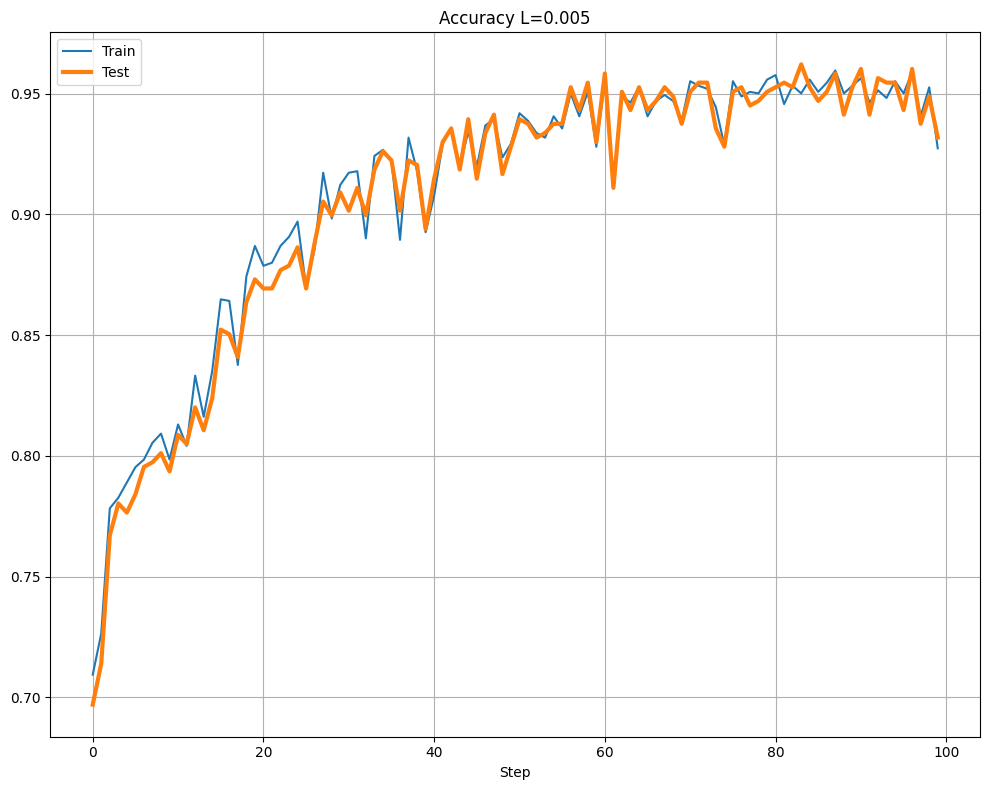

In [15]:
import matplotlib.pyplot as plt

fmt_train = {
    'color': 'tab:blue',
    'ls': 'solid',
    'lw' : 3,
}
fmt_test = {
    'color': 'tab:orange',
    'ls': 'solid',
    'lw' : 3,
}

fig, (ax) = plt.subplots(1,1,figsize=(10,8))

ax.plot(accuracy_train_l, label='Train')
ax.plot(accuracy_test_l, label='Test', **fmt_test)
ax.grid(which='both')
ax.legend()

ax.set_title(f'Accuracy {L=}')
ax.set_xlabel('Step')

fig.tight_layout()

plt.show()

Creamos una red neuronal en forma de funcion que luego usaremos para modificar las iteraciones y los pasos de la red

In [16]:
def red_de_prueba(L, iters):
    accuracy_test_l = []
    accuracy_train_l = []
    cont = 0
    # Número de registros de entrenamiento
    n = X_train.shape[0]
    print(n)
    np.random.seed(5)
    # Inicializar los pesos y sesgos de la red neuronal
    w_hidden = np.random.rand(16, 16) * 2 - 1
    w_output = np.random.rand(1, 16) * 2 - 1

    b_hidden = np.random.rand(16, 1) * 2 - 1
    b_output = np.random.rand(1, 1) * 2 - 1

    # Funciones de activación
    relu = lambda x: np.maximum(x, 0)
    logistic = lambda x: 1 / (1 + np.exp(-x))

    # Forward propagation
    def forward_prop(X):
        Z1 = w_hidden @ X + b_hidden
        A1 = relu(Z1)
        Z2 = w_output @ A1 + b_output
        A2 = logistic(Z2)
        return Z1, A1, Z2, A2
    # Devuelve pendientes para pesos y sesgos
    # usando la regla de la cadena
    
    # Derivadas de las funciones de activación
    d_relu = lambda x: x > 0
    d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2
    
    def backward_prop(Z1, A1, Z2, A2, X, Y):
        dC_dA2 = 2 * A2 - 2 * Y
        dA2_dZ2 = d_logistic(Z2)
        dZ2_dA1 = w_output
        dZ2_dW2 = A1
        dZ2_dB2 = 1
        dA1_dZ1 = d_relu(Z1)
        dZ1_dW1 = X
        dZ1_dB1 = 1

        dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

        dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

        dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

        dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

        dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

        return dC_dW1, dC_dB1, dC_dW2, dC_dB2

    # Ejecutamos descenso de gradiente
    for i in tqdm(range(iters)):
        cont += 1
        # Seleccionamos aleatoriamente un conjunto de datos de entrenamiento
        idx = np.random.choice(n, 1, replace=False)
        X_sample = X_train[idx].transpose()
        Y_sample = Y_train[idx]

        # Pasamos datos seleccionados aleatoriamente a través de la red neuronal
        Z1, A1, Z2, A2 = forward_prop(X_sample)

        # Distribuimos el error a través de la retropropagación
        # y devolvemos pendientes para pesos y sesgos
        dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

        # Actualizar pesos y sesgos
        w_hidden -= L * dW1
        b_hidden -= L * dB1
        w_output -= L * dW2
        b_output -= L * dB2
        if (cont % 1000) == 0 :
            # Cálculo de precisión del test
            test_predictions = forward_prop(X_test.transpose())[3]
            test_predictions = (test_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios (0 o 1)
            accuracy_TEST = np.mean(test_predictions == Y_test.reshape(1, -1))  # Calcular la precisión comparando las predicciones con las etiquetas reales
            accuracy_test_l.append(accuracy_TEST)

            # Cálculo de precisión del train
            train_predictions = forward_prop(X_train.transpose())[3]
            train_predictions = (train_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios (0 o 1)
            accuracy_TRAIN = np.mean(train_predictions == Y_train.reshape(1, -1))  # Calcular la precisión comparando las predicciones con las etiquetas reales
            accuracy_train_l.append(accuracy_TRAIN)
            
    # Cálculo de precisión
    test_predictions = forward_prop(X_test.transpose())[3]
    test_predictions = (test_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios (0 o 1)
    accuracy = np.mean(test_predictions == Y_test.reshape(1, -1))  # Calcular la precisión comparando las predicciones con las etiquetas reales
    print("ACCURACY: ", accuracy)
    import matplotlib.pyplot as plt
    fmt_train = {
        'color': 'tab:blue',
        'ls': 'solid',
        'lw' : 3,
    }
    fmt_test = {
        'color': 'tab:orange',
        'ls': 'solid',
        'lw' : 3,
    }

    fig, (ax) = plt.subplots(1,1,figsize=(10,8))

    ax.plot(accuracy_train_l, label='Train')
    ax.plot(accuracy_test_l, label='Test', **fmt_test)
    ax.grid(which='both')
    ax.legend()

    ax.set_title(f'Accuracy {L=}')
    ax.set_xlabel('Step')

    fig.tight_layout()

    plt.show()

Aqui usamos la funcion de la red neuronal pasandole diferentes parametros de pasos e iteraciones para encontrar la que mas precision tenga

1583


  0%|          | 0/150000 [00:00<?, ?it/s]

ACCURACY:  0.9696969696969697


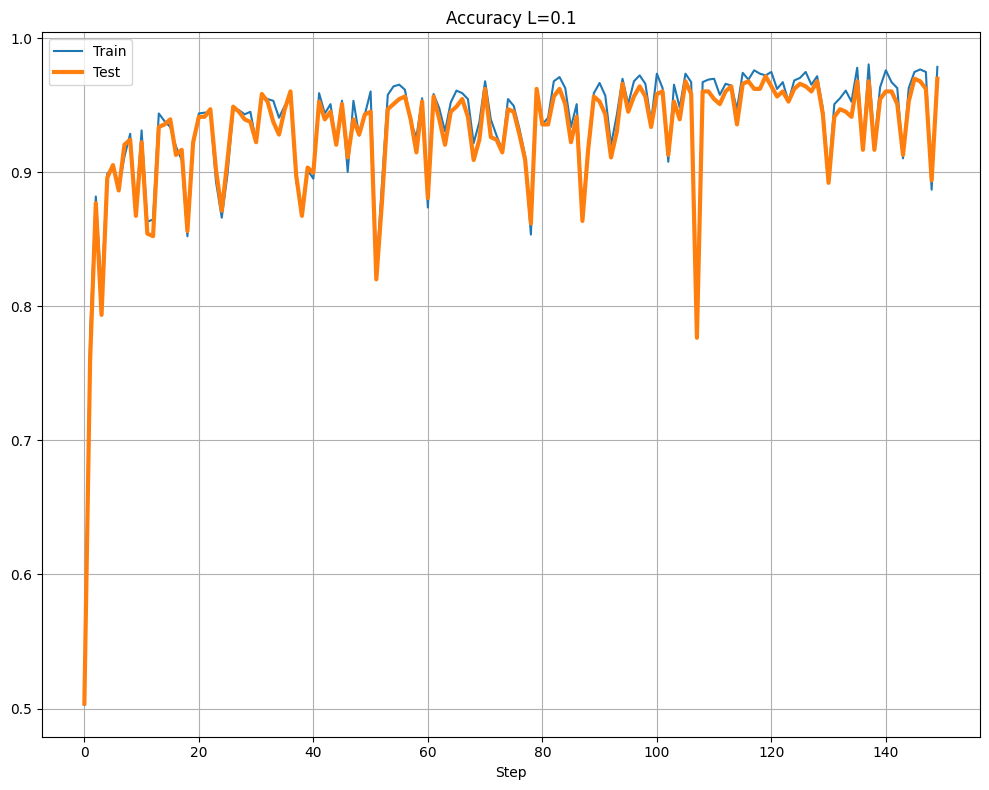

1583


  0%|          | 0/150000 [00:00<?, ?it/s]

ACCURACY:  0.9602272727272727


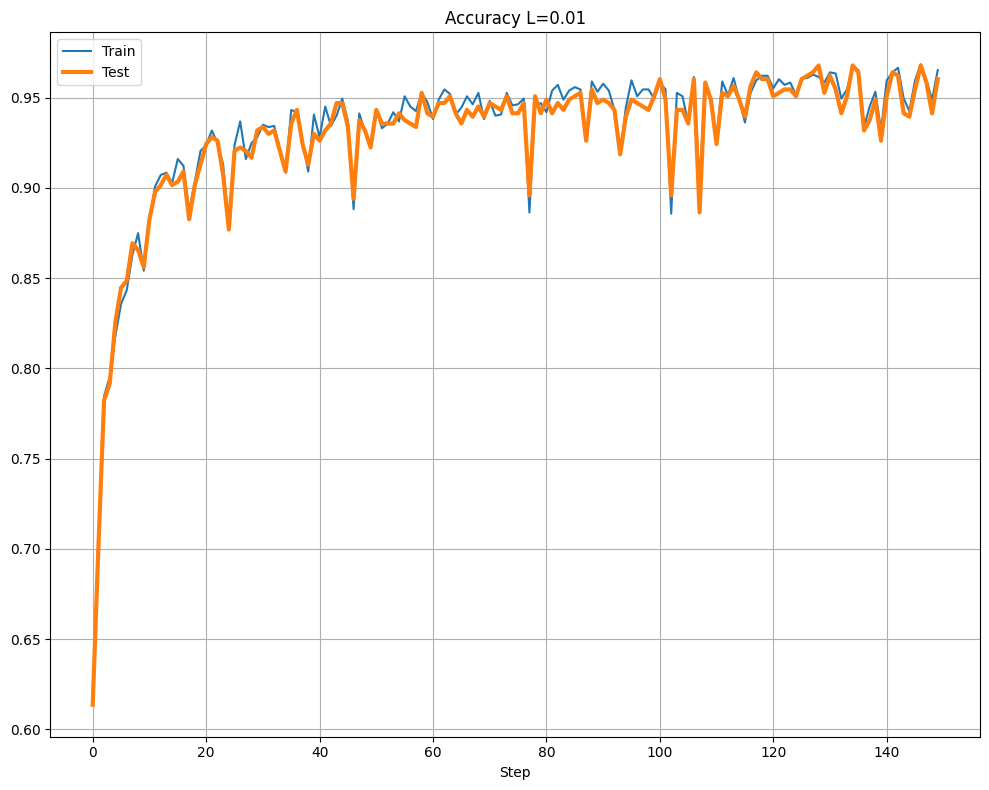

1583


  0%|          | 0/150000 [00:00<?, ?it/s]

ACCURACY:  0.6079545454545454


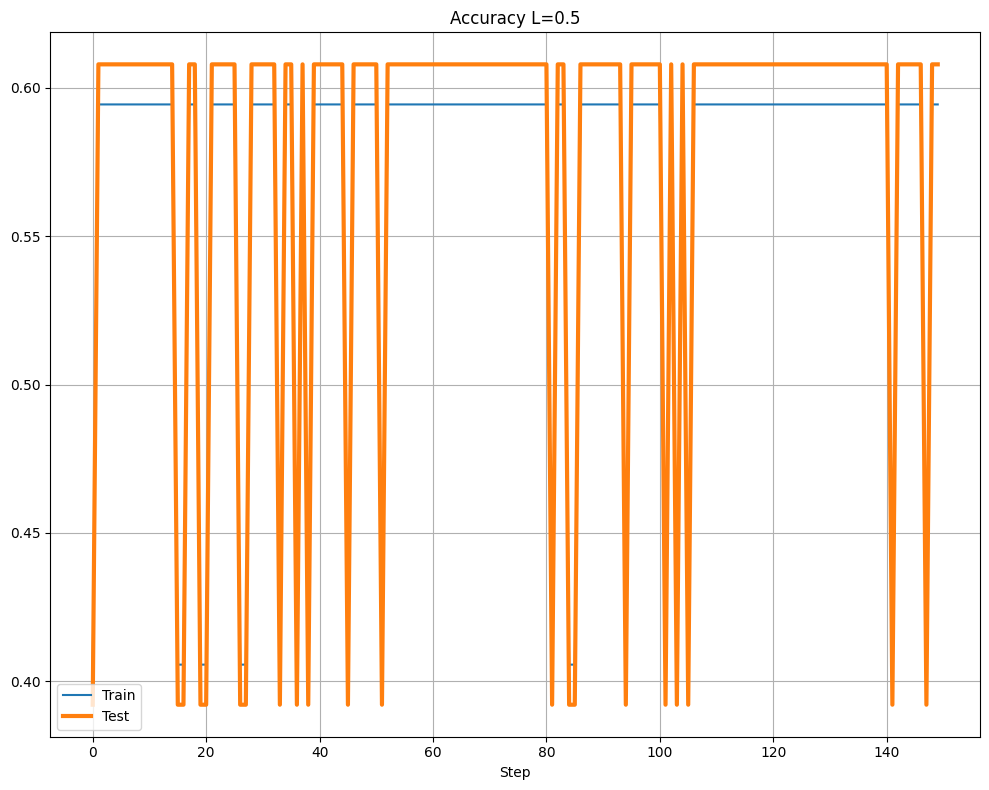

1583


  0%|          | 0/150000 [00:00<?, ?it/s]

ACCURACY:  0.9772727272727273


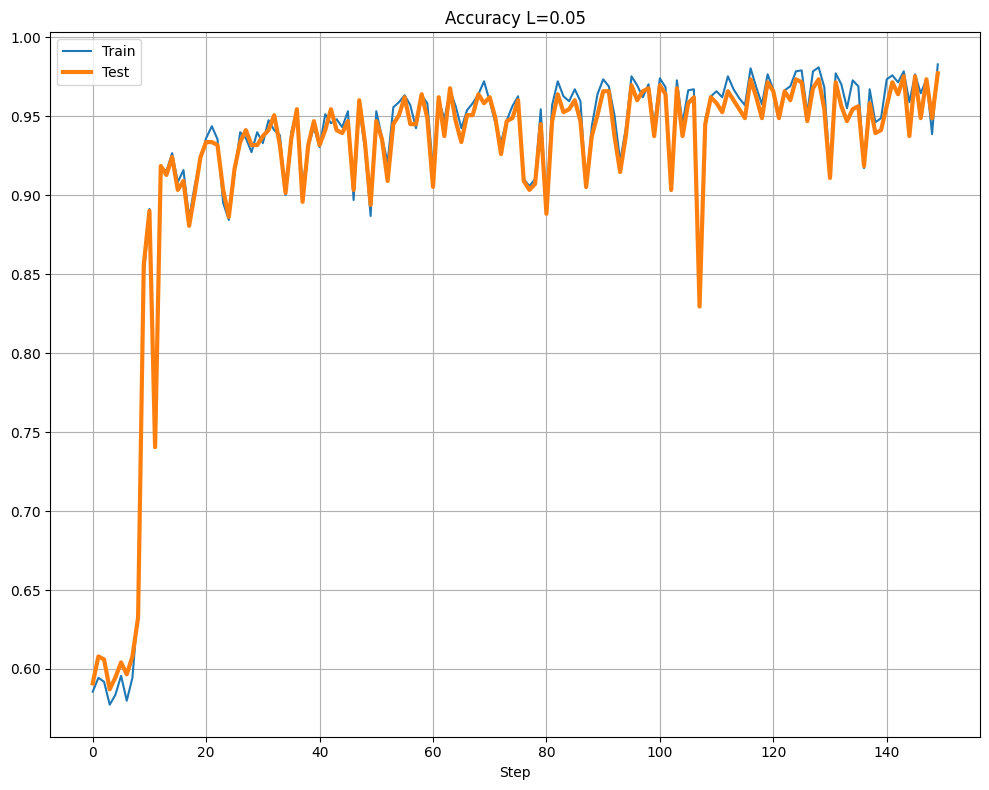

1583


  0%|          | 0/200000 [00:00<?, ?it/s]

ACCURACY:  0.9696969696969697


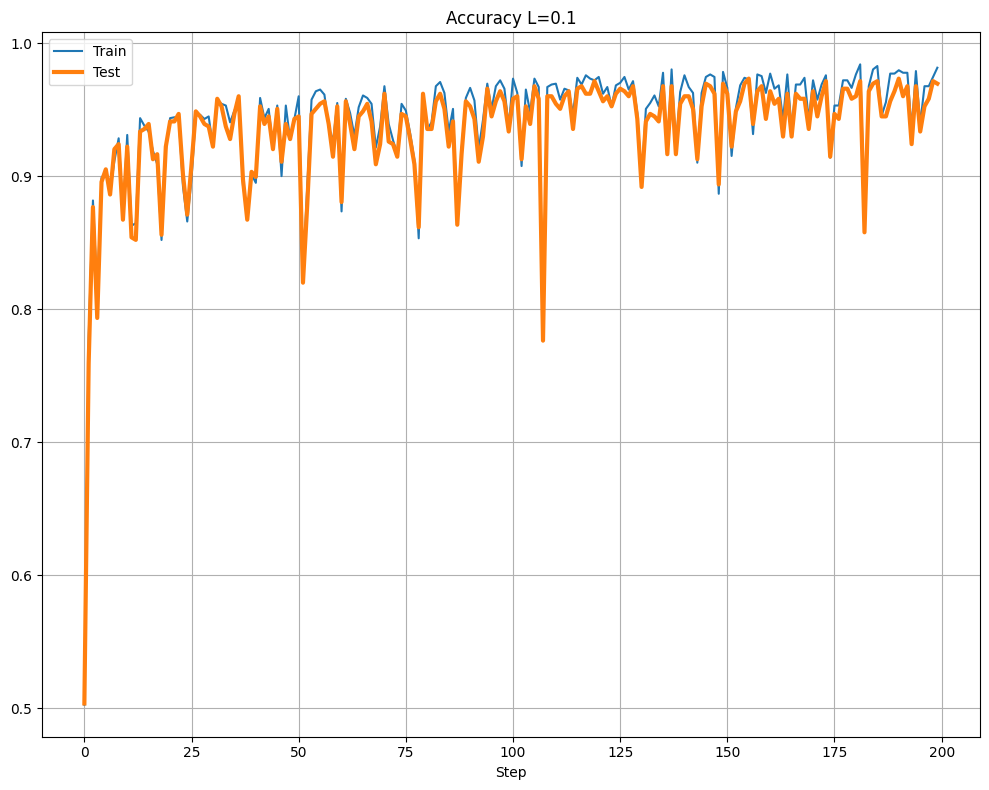

1583


  0%|          | 0/200000 [00:00<?, ?it/s]

ACCURACY:  0.9393939393939394


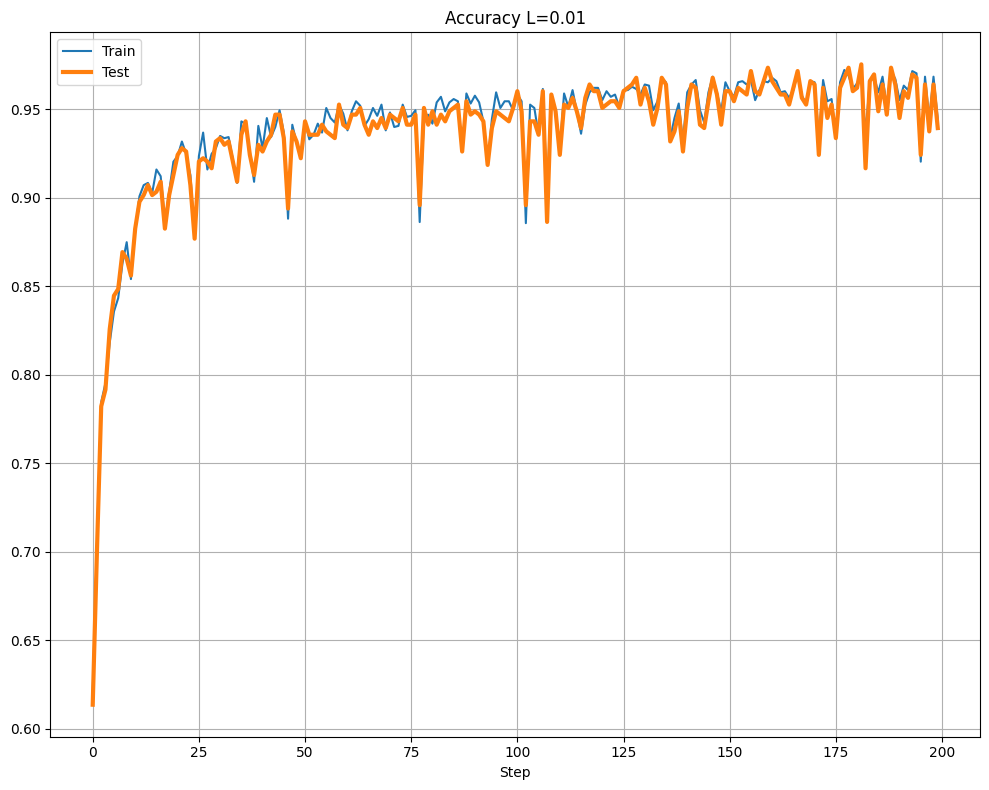

1583


  0%|          | 0/200000 [00:00<?, ?it/s]

ACCURACY:  0.6079545454545454


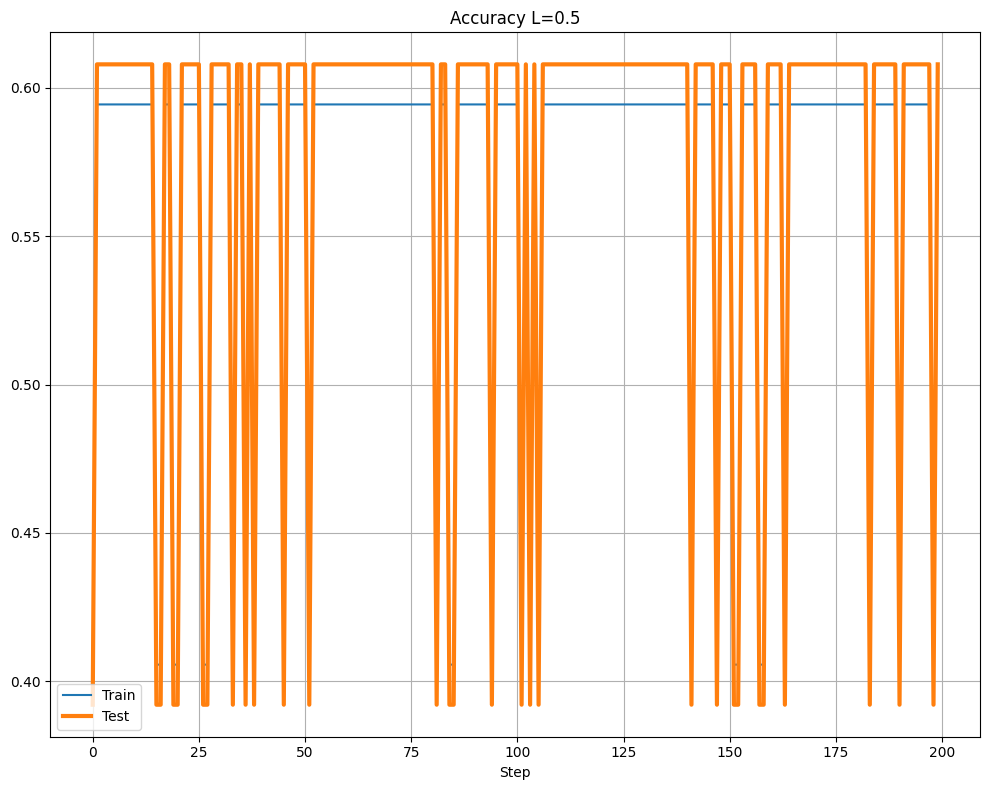

1583


  0%|          | 0/200000 [00:00<?, ?it/s]

ACCURACY:  0.9356060606060606


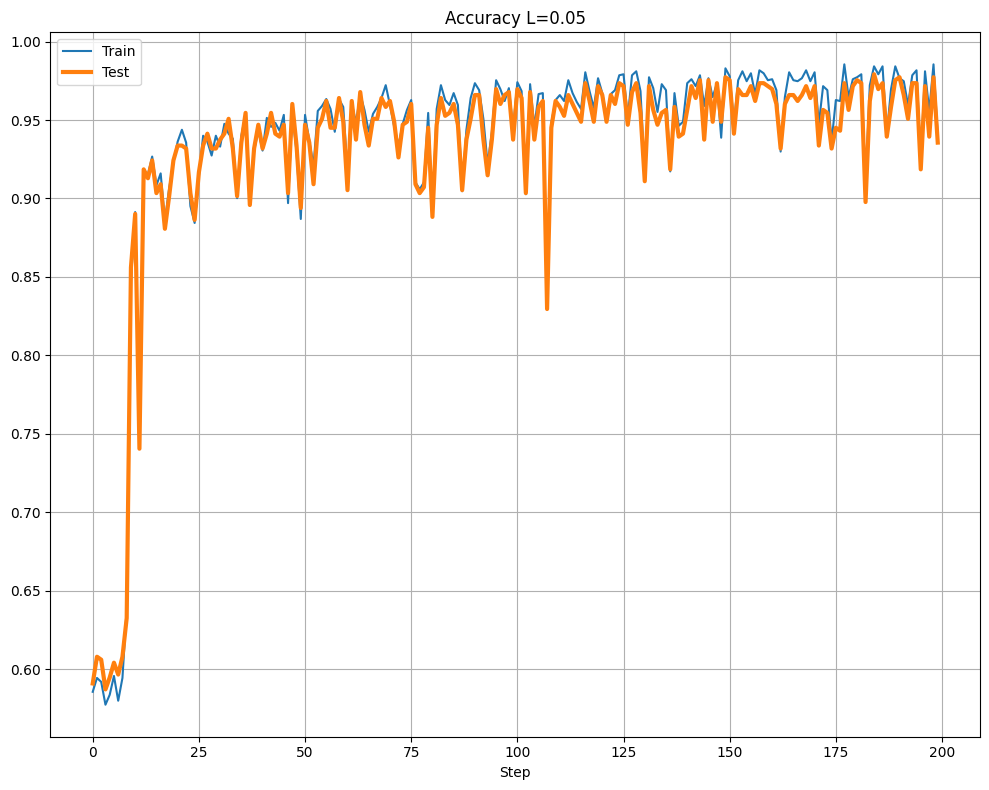

1583


  0%|          | 0/500000 [00:00<?, ?it/s]

ACCURACY:  0.9696969696969697


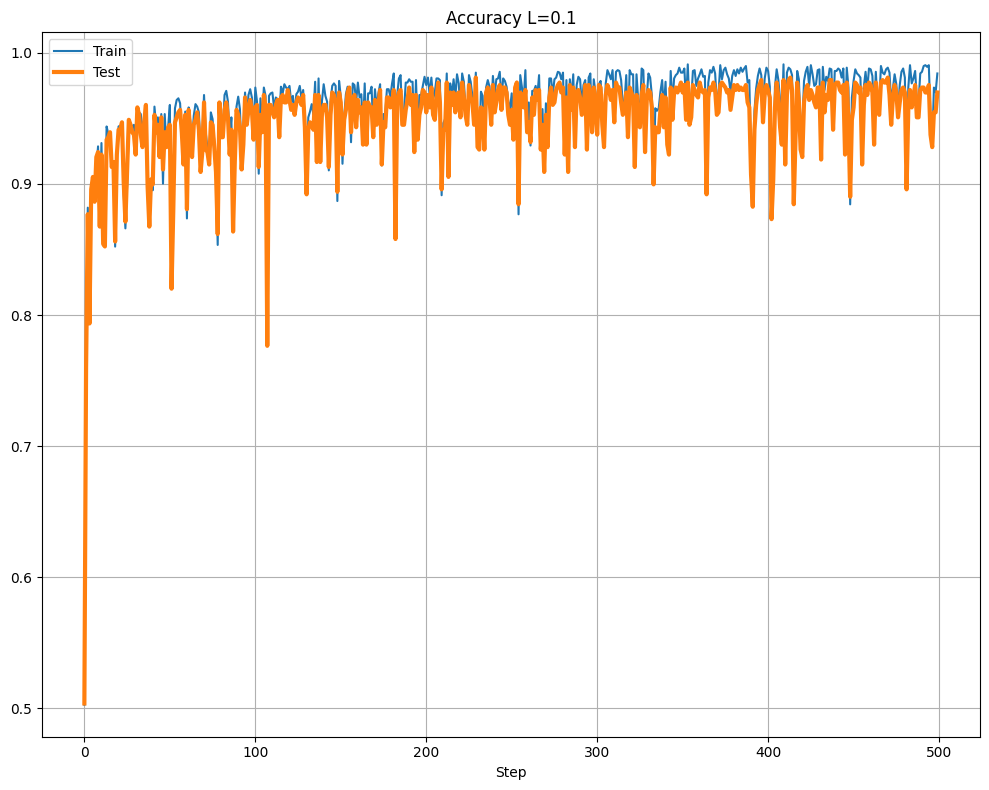

1583


  0%|          | 0/500000 [00:00<?, ?it/s]

ACCURACY:  0.9753787878787878


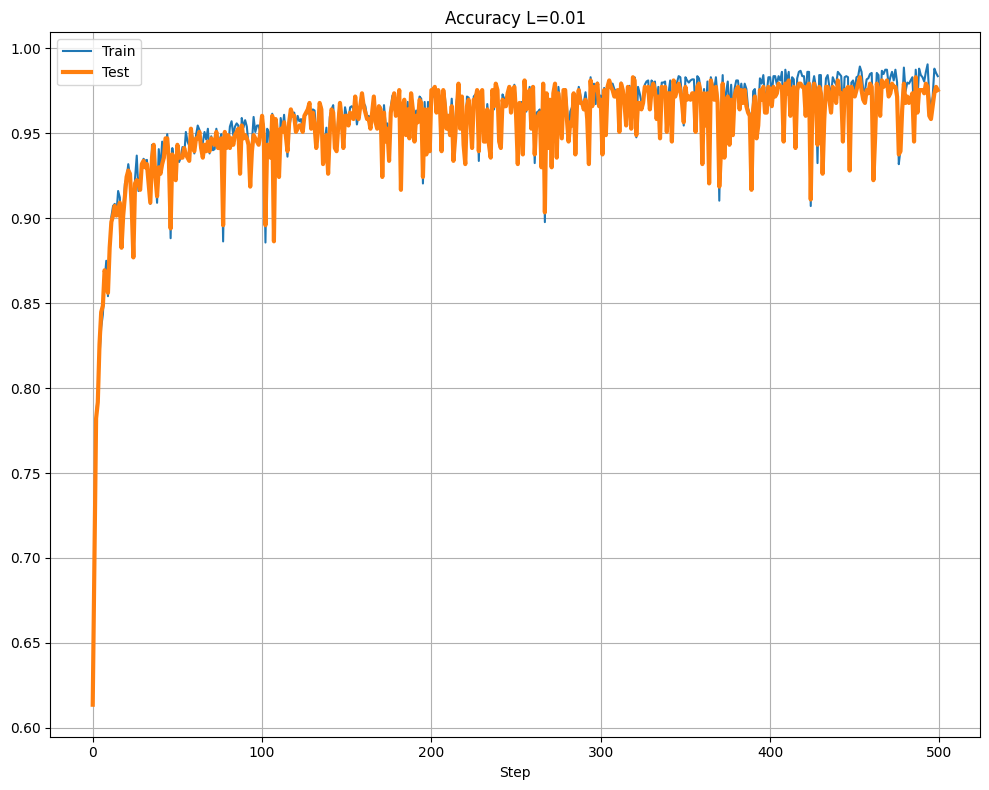

1583


  0%|          | 0/500000 [00:00<?, ?it/s]

ACCURACY:  0.6079545454545454


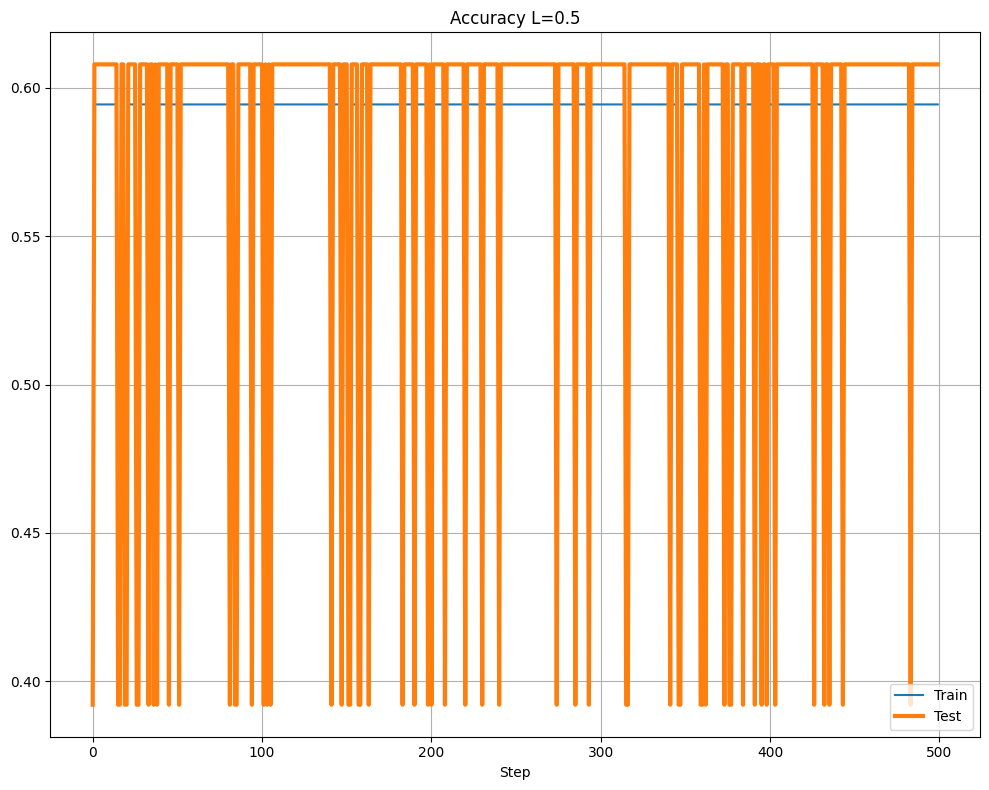

1583


  0%|          | 0/500000 [00:00<?, ?it/s]

ACCURACY:  0.9696969696969697


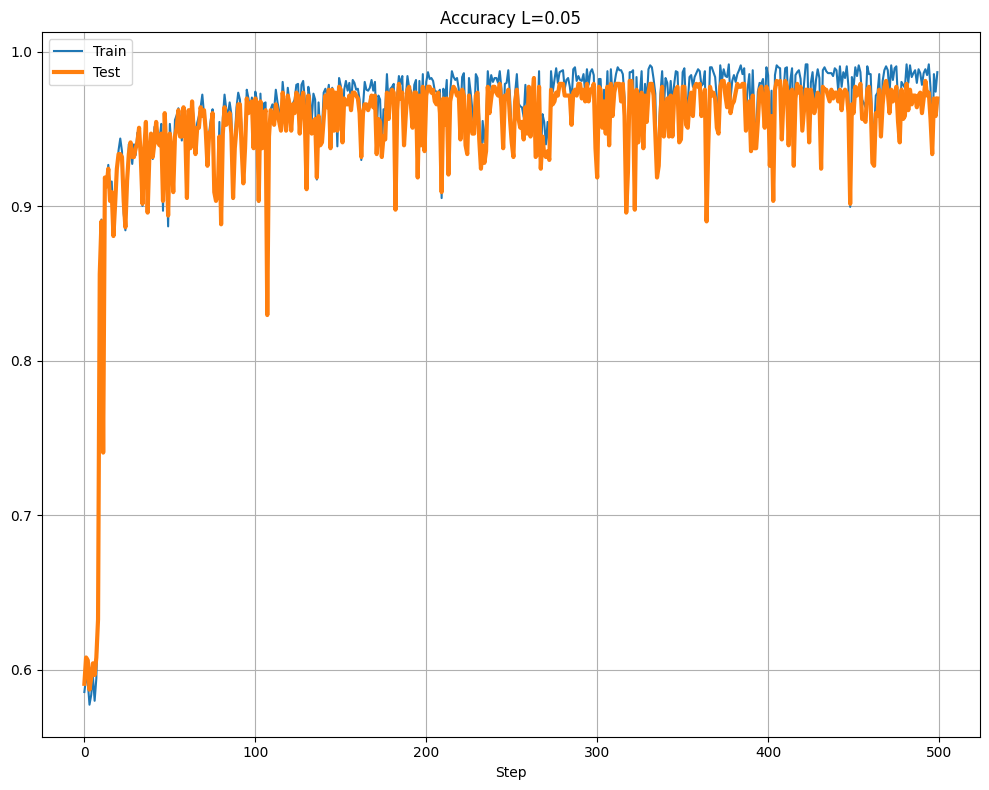

In [17]:
iters_l = [150000,200000,500000]
L_l = [0.1,0.01,0.5,0.05]
for iter in iters_l:
    for L in L_l :
        red_de_prueba(L=L, iters=iter)

Definimos características de entrada para los nuevos datos.
Buscamos 15 filas aleatorias del Dataframe que ya estan escaladas para poder probar el rendimiento de la red neuronal

In [18]:
filas_de_prueba = df.loc[:, ["NObeyesdad"] + features].sample(n=15)

#Imprimir las filas aleatorias
filas_de_prueba

,NObeyesdad,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
1451,1,0.343030,1.0,0.910730,0.610902,0.2,1.0,0.666667,0.750000,0.0,0.0,0.763456,1.0,0.000362,0.272064,0.333333,0.5
1348,1,0.368350,1.0,0.890159,0.606937,0.2,1.0,0.760934,0.750000,0.0,0.0,0.701421,1.0,0.333333,0.000000,0.333333,0.5
442,0,0.426230,1.0,0.868687,0.375723,0.2,1.0,0.666667,0.750000,0.0,0.0,0.666667,1.0,0.000000,0.500000,0.333333,0.0
130,0,0.327869,0.0,0.797980,0.306358,0.0,1.0,0.666667,1.000000,0.0,0.0,0.666667,1.0,0.333333,0.500000,0.666667,0.5
296,0,0.344262,0.0,0.772727,0.306358,0.2,1.0,1.000000,0.750000,0.0,0.0,0.666667,0.0,0.666667,0.500000,0.333333,0.5
342,1,0.377049,1.0,0.878788,0.606936,0.2,1.0,1.000000,0.750000,0.0,0.0,0.666667,1.0,0.333333,0.000000,0.333333,0.5
1068,1,0.355888,1.0,0.837572,0.462428,0.0,1.0,0.666667,0.750000,0.0,0.0,0.666667,1.0,0.979911,0.846144,0.333333,0.5
694,0,0.285330,1.0,0.921843,0.340541,0.0,1.0,0.860291,0.971977,0.0,0.0,0.666667,1.0,0.666667,0.226825,0.333333,1.0
1281,1,0.602076,1.0,0.902788,0.581645,0.5,1.0,0.677062,0.748151,0.0,0.0,0.950751,1.0,0.667077,0.180185,0.333333,1.0
1783,1,0.391507,1.0,0.924228,0.699663,0.2,1.0,0.894778,0.677809,0.0,0.0,0.910777,1.0,0.385341,0.221228,0.333333,0.5


In [19]:
# Eliminamos la columna 'NObeyesdad' del DataFrame 'filas_de_prueba'
df_ejemplos = filas_de_prueba.drop(columns=["NObeyesdad"])

# Imprimimos el DataFrame después de eliminar la columna
df_ejemplos

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
1451,0.343030,1.0,0.910730,0.610902,0.2,1.0,0.666667,0.750000,0.0,0.0,0.763456,1.0,0.000362,0.272064,0.333333,0.5
1348,0.368350,1.0,0.890159,0.606937,0.2,1.0,0.760934,0.750000,0.0,0.0,0.701421,1.0,0.333333,0.000000,0.333333,0.5
442,0.426230,1.0,0.868687,0.375723,0.2,1.0,0.666667,0.750000,0.0,0.0,0.666667,1.0,0.000000,0.500000,0.333333,0.0
130,0.327869,0.0,0.797980,0.306358,0.0,1.0,0.666667,1.000000,0.0,0.0,0.666667,1.0,0.333333,0.500000,0.666667,0.5
296,0.344262,0.0,0.772727,0.306358,0.2,1.0,1.000000,0.750000,0.0,0.0,0.666667,0.0,0.666667,0.500000,0.333333,0.5
342,0.377049,1.0,0.878788,0.606936,0.2,1.0,1.000000,0.750000,0.0,0.0,0.666667,1.0,0.333333,0.000000,0.333333,0.5
1068,0.355888,1.0,0.837572,0.462428,0.0,1.0,0.666667,0.750000,0.0,0.0,0.666667,1.0,0.979911,0.846144,0.333333,0.5
694,0.285330,1.0,0.921843,0.340541,0.0,1.0,0.860291,0.971977,0.0,0.0,0.666667,1.0,0.666667,0.226825,0.333333,1.0
1281,0.602076,1.0,0.902788,0.581645,0.5,1.0,0.677062,0.748151,0.0,0.0,0.950751,1.0,0.667077,0.180185,0.333333,1.0
1783,0.391507,1.0,0.924228,0.699663,0.2,1.0,0.894778,0.677809,0.0,0.0,0.910777,1.0,0.385341,0.221228,0.333333,0.5


In [20]:
df_ejemplos.describe()


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.0,15.0,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.373313,0.800000,0.868974,0.479456,0.153333,0.933333,0.800427,0.725489,0.0,0.0,0.696667,0.933333,0.455316,0.349763,0.355556,0.566667
std,0.074603,0.414039,0.057526,0.143081,0.135576,0.258199,0.145430,0.168618,0.0,0.0,0.107854,0.258199,0.296008,0.309126,0.086066,0.258199
min,0.278689,0.000000,0.757576,0.306358,0.000000,0.000000,0.666667,0.250000,0.0,0.0,0.520021,0.000000,0.000000,0.000000,0.333333,0.000000
25%,0.343646,1.000000,0.837978,0.359564,0.000000,1.000000,0.666667,0.712981,0.0,0.0,0.666667,1.000000,0.301648,0.090093,0.333333,0.500000
50%,0.368350,1.000000,0.878788,0.462428,0.200000,1.000000,0.760934,0.750000,0.0,0.0,0.666667,1.000000,0.333333,0.272064,0.333333,0.500000
75%,0.391526,1.000000,0.916287,0.606937,0.200000,1.000000,0.947389,0.750000,0.0,0.0,0.684044,1.000000,0.666667,0.500000,0.333333,0.500000
max,0.602076,1.000000,0.934094,0.702664,0.500000,1.000000,1.000000,1.000000,0.0,0.0,0.950751,1.000000,0.979911,1.000000,0.666667,1.000000


Utilizamos la red neuronal para predecir en cada uno de los ejemplos



In [21]:
for ID, row in df_ejemplos.iterrows():
    ejemplo_actual = row.values.reshape(1, -1)  # Convertimos la fila en una matriz de una sola fila
    
    # Propagamos hacia adelante el ejemplo actual a través de la red neuronal
    Z1_new, A1_new, Z2_new, A2_new = forward_prop(ejemplo_actual.transpose())

    # Obtenemos la predicción (0 para Exceso de peso y 1 para un Peso normal) usando un umbral de 0.5
    prediccion_actual = (A2_new > 0.5).astype(int)
    
    if(prediccion_actual == 1):
        prediccion_actual = "Obesa"
    else: prediccion_actual = "NO obesa"

    # Mostrar la predicción actual
    print("Predicción para el ejemplo", ID, ":", prediccion_actual)
    print("Activaciones de la capa de salida para el ejemplo", ID, ":", A2_new)
    print(" ")
    print(" ")

Predicción para el ejemplo 1451 : Obesa
Activaciones de la capa de salida para el ejemplo 1451 : [[0.99144064]]
 
 
Predicción para el ejemplo 1348 : Obesa
Activaciones de la capa de salida para el ejemplo 1348 : [[0.98719451]]
 
 
Predicción para el ejemplo 442 : NO obesa
Activaciones de la capa de salida para el ejemplo 442 : [[0.15089388]]
 
 
Predicción para el ejemplo 130 : NO obesa
Activaciones de la capa de salida para el ejemplo 130 : [[0.04503242]]
 
 
Predicción para el ejemplo 296 : NO obesa
Activaciones de la capa de salida para el ejemplo 296 : [[0.00314927]]
 
 
Predicción para el ejemplo 342 : Obesa
Activaciones de la capa de salida para el ejemplo 342 : [[0.98798284]]
 
 
Predicción para el ejemplo 1068 : Obesa
Activaciones de la capa de salida para el ejemplo 1068 : [[0.82782344]]
 
 
Predicción para el ejemplo 694 : NO obesa
Activaciones de la capa de salida para el ejemplo 694 : [[0.00894209]]
 
 
Predicción para el ejemplo 1281 : Obesa
Activaciones de la capa de sal

Ahora hacemos la red con Sickitlearn para comparar el rendimiento

In [22]:
# Cargamos datos
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

X = df[features].values
Y = df['NObeyesdad'].values

# Separamos los datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/4)

nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(16),
                   activation='relu',
                   max_iter=1_000_000,
                   learning_rate_init=.005)

nn.fit(X_train, Y_train)


print("Puntaje del conjunto de entrenamiento: %f" % nn.score(X_train, Y_train))
print("Puntaje del conjunto de prueba: %f" % nn.score(X_test, Y_test))

Puntaje del conjunto de entrenamiento: 0.972836
Puntaje del conjunto de prueba: 0.969697


Probamos con los ejemplos

In [23]:
for index, row in df_ejemplos.iterrows():
    ejemplo_actual = row.values.reshape(1, -1)  # Convertimos la fila en una matriz de una sola fila
    predicciones = nn.predict(ejemplo_actual)
    if(predicciones == 1):
        predicciones = "No obesa"
    else: predicciones = "Obesa"
    print("La persona es:", predicciones)
    print(" ")
    print(" ")

La persona es: No obesa
 
 
La persona es: No obesa
 
 
La persona es: Obesa
 
 
La persona es: Obesa
 
 
La persona es: Obesa
 
 
La persona es: No obesa
 
 
La persona es: No obesa
 
 
La persona es: Obesa
 
 
La persona es: No obesa
 
 
La persona es: No obesa
 
 
La persona es: No obesa
 
 
La persona es: No obesa
 
 
La persona es: No obesa
 
 
La persona es: Obesa
 
 
La persona es: Obesa
 
 
